In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from pandas.tseries.offsets import Day, MonthEnd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
import folium
from IPython.display import HTML
%matplotlib inline

# Data Acquisition


In [56]:
mtg_data = pd.read_csv('../data/30-yr_historics_mortgage_rate.csv', sep=',',parse_dates = ['Date'], index_col = 0)
fed_rsv_index_data = pd.read_csv('../data/index.csv', sep=',',parse_dates = ['Date'], index_col = 0)
hpi_data = pd.read_csv('../data/HPI_master.csv', sep=',',parse_dates = ['hpi_start_date'], index_col = 10)

# Data Preparation

## Data Exploration - Mortgage Rate


In [57]:
mtg_data.head()

,U.S Interest Rate,Fees & Points,Regional_Interest_Rate_NE,Regional_Interest_Rate_SE,Regional_Interest_Rate_NC,Regional_Interest_Rate_SW,Regional_Interest_Rate_W,Regional_Fees_Points_NE,Regional_Fees_Points_SE,Regional_Fees_Points_NC,Regional_Fees_Points_SW,Regional_Fees_Points_W
Date,,,,,,,,,,,,
1971-04-02,7.33,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-09,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-16,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-23,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-30,7.29,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete unwanted columns Unnamed:13 to Unnames:19


In [58]:
del_col_list = list(mtg_data.columns.values[12:])
for col in del_col_list:
    del mtg_data[col]
    



In [59]:
mtg_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
U.S Interest Rate,2336.0,8.352551,3.107084,3.31,6.2200,7.865,9.9200,18.63
Regional_Interest_Rate_NE,2072.0,8.347949,3.292605,3.35,6.0600,7.795,10.1300,18.66
Regional_Interest_Rate_SE,2072.0,8.347548,3.293918,3.35,5.9900,7.830,10.1425,18.60
Regional_Interest_Rate_NC,2072.0,8.396438,3.289184,3.28,6.0800,7.885,10.2500,18.52
Regional_Interest_Rate_SW,2072.0,8.334624,3.247115,3.33,6.0075,7.840,10.1225,18.50
Regional_Interest_Rate_W,2072.0,8.385043,3.325410,3.27,5.9900,7.845,10.3025,18.89
Regional_Fees_Points_NE,1961.0,1.412086,0.833955,0.10,0.7000,1.100,2.1000,7.90
Regional_Fees_Points_SE,1961.0,1.444110,0.784822,0.30,0.7000,1.500,2.0000,3.30
Regional_Fees_Points_NC,1961.0,1.287200,0.791630,0.10,0.6000,1.000,2.0000,3.00
Regional_Fees_Points_SW,1961.0,1.270525,0.684812,0.20,0.6000,1.000,1.8000,3.60


In [60]:
mtg_data.isnull().any()

U.S Interest Rate             False
Fees & Points                 False
Regional_Interest_Rate_NE      True
Regional_Interest_Rate_SE      True
Regional_Interest_Rate_NC      True
Regional_Interest_Rate_SW      True
Regional_Interest_Rate_W       True
Regional_Fees_Points_NE        True
Regional_Fees_Points_SE        True
Regional_Fees_Points_NC        True
Regional_Fees_Points_SW        True
Regional_Fees_Points_W         True
dtype: bool

## Data Prepration - Mortgage Rate

Get Quarterly average of Mortgage Interest Rates because HPI data is quarterly based

In [61]:
mtg_data.index = pd.to_datetime(mtg_data.index)
mtg_data_q_avg = mtg_data.resample("Q").mean()
#mtg_data_m_avg.head()

In [62]:
mtg_data_q_avg.head()
mtg_data_q_avg.index
mtg_data_q_avg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
U.S Interest Rate,179.0,8.352649,3.104592,3.359231,6.225385,7.840714,9.983462,17.735714
Regional_Interest_Rate_NE,160.0,8.350705,3.278866,3.396923,6.080769,7.770824,10.071538,17.829286
Regional_Interest_Rate_SE,160.0,8.350615,3.280875,3.393846,6.047308,7.840962,10.119808,17.960000
Regional_Interest_Rate_NC,160.0,8.398870,3.274944,3.335385,6.111731,7.869423,10.219231,17.784286
Regional_Interest_Rate_SW,160.0,8.337653,3.233826,3.383846,6.019231,7.834505,10.096731,17.702857
Regional_Interest_Rate_W,160.0,8.387843,3.307263,3.319231,6.001154,7.815879,10.272692,17.619286
Regional_Fees_Points_NE,160.0,1.407018,0.802751,0.184615,0.661538,1.042857,2.133494,2.961538
Regional_Fees_Points_SE,160.0,1.482000,0.773677,0.453846,0.749038,1.500000,2.000000,3.192308
Regional_Fees_Points_NC,160.0,1.320507,0.791119,0.230769,0.628846,1.238462,2.000000,2.776923
Regional_Fees_Points_SW,160.0,1.280168,0.660037,0.330769,0.644231,1.019231,1.801923,3.030769


Filter the data to match range of data available for HPI

In [63]:
mtg_data_q_avg_filter_grt = mtg_data_q_avg.index >= pd.to_datetime('01/31/1975', format='%m/%d/%Y')
mtg_data_q_avg_filter_lst = mtg_data_q_avg.index <= pd.to_datetime('12/31/2015', format='%m/%d/%Y')

In [64]:
mtg_data_q_avg_filtered = mtg_data_q_avg[mtg_data_q_avg_filter_grt & mtg_data_q_avg_filter_lst]

In [65]:
mtg_data_q_avg_filtered[mtg_data_q_avg_filtered['U.S Interest Rate']==17.735714285714284]

,U.S Interest Rate,Regional_Interest_Rate_NE,Regional_Interest_Rate_SE,Regional_Interest_Rate_NC,Regional_Interest_Rate_SW,Regional_Interest_Rate_W,Regional_Fees_Points_NE,Regional_Fees_Points_SE,Regional_Fees_Points_NC,Regional_Fees_Points_SW,Regional_Fees_Points_W
Date,,,,,,,,,,,
1981-12-31,17.735714,17.829286,17.96,17.784286,17.702857,17.619286,2.271429,2.707143,2.557143,1.921429,1.8


In [66]:
mtg_data_q_avg_filtered['U.S Interest Rate'].min()
mtg_data_q_avg_filtered[mtg_data_q_avg_filtered['U.S Interest Rate']==3.359230769230769]

,U.S Interest Rate,Regional_Interest_Rate_NE,Regional_Interest_Rate_SE,Regional_Interest_Rate_NC,Regional_Interest_Rate_SW,Regional_Interest_Rate_W,Regional_Fees_Points_NE,Regional_Fees_Points_SE,Regional_Fees_Points_NC,Regional_Fees_Points_SW,Regional_Fees_Points_W
Date,,,,,,,,,,,
2012-12-31,3.359231,3.396923,3.393846,3.335385,3.383846,3.319231,0.592308,0.738462,0.692308,0.7,0.738462


## Data Visualization - Mortgage Rate

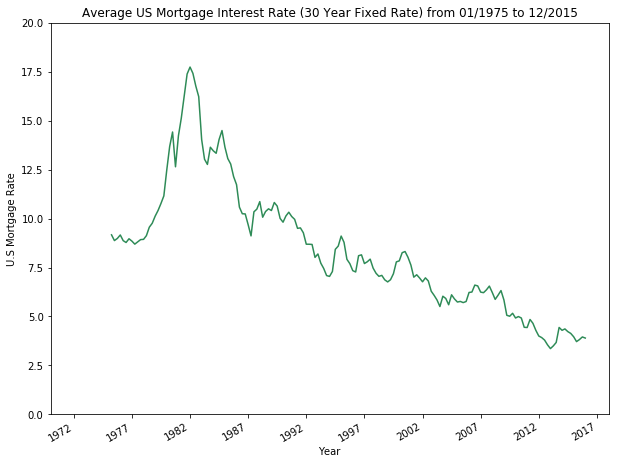

In [67]:
fig, axis = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
axis.set_xlabel('Year')
axis.set_ylabel('U.S Mortgage Rate')
axis.set_ylim([0,20])
axis.set_xlim([datetime.date(1970,1,1), datetime.date(2018,1,1)])
fig.autofmt_xdate()
plt.title("Average US Mortgage Interest Rate (30 Year Fixed Rate) from 01/1975 to 12/2015")
plt.plot(mtg_data_q_avg_filtered.index, mtg_data_q_avg_filtered['U.S Interest Rate'].values,color='seagreen')

## Data Exploration - Inflation and Unemployment Rates

In [68]:
fed_rsv_index_data.head()

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Date,,,,,,,
1954-07-01,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1954-08-01,NaN,NaN,NaN,1.22,NaN,6.0,NaN
1954-09-01,NaN,NaN,NaN,1.06,NaN,6.1,NaN
1954-10-01,NaN,NaN,NaN,0.85,8.0,5.7,NaN
1954-11-01,NaN,NaN,NaN,0.83,NaN,5.3,NaN


Since HPI data is quarterly based, transform the indices data to quarterly

In [69]:
fed_rsv_index_data.index = pd.to_datetime(fed_rsv_index_data.index)
fed_rsv_index_data_avg = fed_rsv_index_data.resample("Q").mean()

## Data Preparation - Inflation and Unemployment Rates

filter the data to match the same range as that of Mortagage Interest data

In [70]:
fed_rs_idx_filter_grt = fed_rsv_index_data_avg.index >= pd.to_datetime('01/31/1975', format='%m/%d/%Y')
fed_rs_idx_filter_lst = fed_rsv_index_data_avg.index <= pd.to_datetime('12/31/2015', format='%m/%d/%Y')

In [71]:
fed_rsv_index_data_filtered = fed_rsv_index_data_avg[fed_rs_idx_filter_grt & fed_rs_idx_filter_lst]
fed_rsv_index_data_filtered.isnull().any()

Federal Funds Target Rate        True
Federal Funds Upper Target       True
Federal Funds Lower Target       True
Effective Federal Funds Rate    False
Real GDP (Percent Change)       False
Unemployment Rate               False
Inflation Rate                  False
dtype: bool

In [72]:
fed_rsv_index_data_filtered[fed_rsv_index_data_filtered['Inflation Rate']>=13]

fed_rsv_index_data_filtered['Inflation Rate'].min()
fed_rsv_index_data_filtered[fed_rsv_index_data_filtered['Inflation Rate']==0.7333333333333334]

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Date,,,,,,,
2010-12-31,NaN,0.25,0.0,0.186667,2.5,9.5,0.733333


## Data Visualization - Inflation and Unemployment Rates

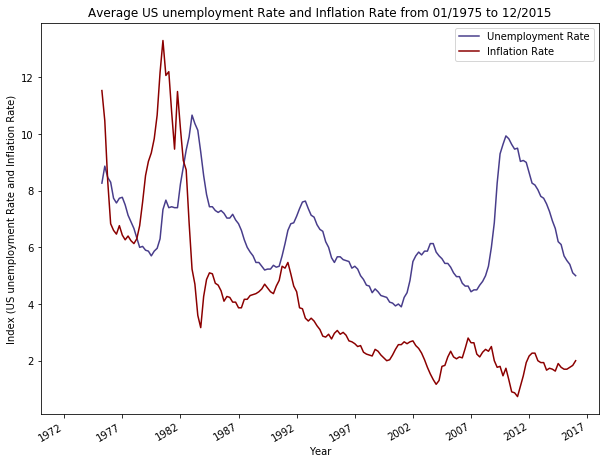

In [73]:
fig, axis = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
axis.set_xlabel('Year')
axis.set_ylabel('Index (US unemployment Rate and Inflation Rate)')
axis.set_xlim([datetime.date(1970,1,1), datetime.date(2018,1,1)])
fig.autofmt_xdate()
plt.title("Average US unemployment Rate and Inflation Rate from 01/1975 to 12/2015")
plt.plot(fed_rsv_index_data_filtered.index, fed_rsv_index_data_filtered['Unemployment Rate'],color='darkslateblue')
plt.plot(fed_rsv_index_data_filtered.index, fed_rsv_index_data_filtered['Inflation Rate'].values,color='darkred')
plt.legend(['Unemployment Rate', 'Inflation Rate'])

## Data Exploration - Housing Price Index

In [74]:
hpi_data.index = pd.to_datetime(hpi_data.index)

In [75]:
#hpi_data.head()
hpi_fil_trad = hpi_data['hpi_type']=='traditional'
hpi_fil_level = hpi_data['level'] == 'USA or Census Division'
hpi_fil_freq = hpi_data['frequency']== 'quarterly'
hpi_fil_flv = hpi_data['hpi_flavor']== 'all-transactions'
hpi_data_filtered = hpi_data[hpi_fil_trad & hpi_fil_level & hpi_fil_freq & hpi_fil_flv]
#hpi_data_filtered.sort_values(by=['yr', 'period'], ascending=True)


In [76]:
hpi_data_filtered['hpi_type'].unique()

hpi_data_filtered['frequency'].unique()
hpi_data_filtered['hpi_flavor'].unique()
#hpi_data_filtered.describe().transpose()

array(['all-transactions'], dtype=object)

## Data Preparation - Housing Price Index

In [77]:
hpi_data_filtered.index = hpi_data_filtered.index + pd.offsets.MonthEnd(0)
#hpi_data_filtered.head()
#hpi_data_filtered.sort_values(by=['yr', 'period'], ascending=True)

In [78]:
hpi_data_fil_filter_grt = hpi_data_filtered.index >= pd.to_datetime('01/31/1975', format='%m/%d/%Y')
hpi_data_fil_filter_lst = hpi_data_filtered.index <= pd.to_datetime('12/31/2015', format='%m/%d/%Y')

In [79]:
hpi_filtered = hpi_data_filtered[hpi_data_fil_filter_grt & hpi_data_fil_filter_lst]
hpi_filtered[hpi_filtered['index_nsa'] ==hpi_filtered['index_nsa'].max()]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
hpi_start_date,,,,,,,,,,
2006-12-31,traditional,all-transactions,quarterly,USA or Census Division,Pacific Division,DV_PAC,2006,4,595.59,NaN


Create filters for each division

In [80]:
#hpi_data_filtered.sort_values(by=['yr', 'period'], ascending=True)
hpi_filtered.head()
hpi_filtered.isnull().any()
hpi_filtered['place_name'].unique()
hpi_fil_enc = hpi_filtered['place_name'] =='East North Central Division'
hpi_fil_esc = hpi_filtered['place_name'] =='East South Central Division'
hpi_fil_ma = hpi_filtered['place_name'] =='Middle Atlantic Division'
hpi_fil_mt = hpi_filtered['place_name'] =='Mountain Division'
hpi_fil_ne = hpi_filtered['place_name'] =='New England Division'
hpi_fil_pc = hpi_filtered['place_name'] =='Pacific Division'
hpi_fil_sa = hpi_filtered['place_name'] =='South Atlantic Division'
hpi_fil_wnc = hpi_filtered['place_name'] =='West North Central Division'
hpi_fil_wsc = hpi_filtered['place_name'] =='West South Central Division'
hpi_fil_us = hpi_filtered['place_name'] =='United States'


## Data Visualization - HPI - Division wise

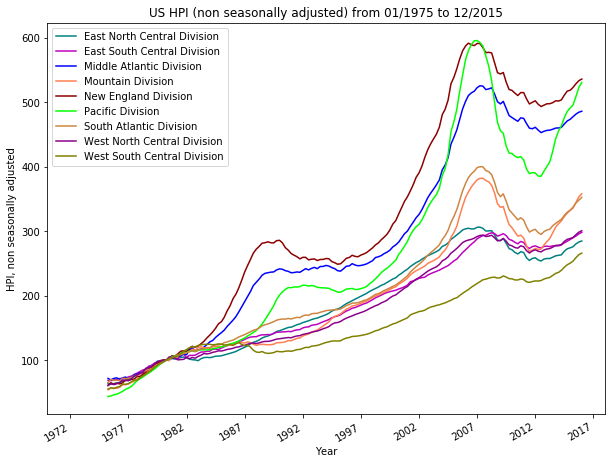

In [81]:
fig, axis = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
axis.set_xlabel('Year')
axis.set_ylabel('HPI, non seasonally adjusted')
axis.set_xlim([datetime.date(1970,1,1), datetime.date(2018,1,1)])
fig.autofmt_xdate()
plt.title("US HPI (non seasonally adjusted) from 01/1975 to 12/2015")
plt.plot(hpi_filtered[hpi_fil_enc].index, hpi_filtered[hpi_fil_enc].index_nsa.values,color='teal')
plt.plot(hpi_filtered[hpi_fil_esc].index, hpi_filtered[hpi_fil_esc].index_nsa.values,color='m')
plt.plot(hpi_filtered[hpi_fil_ma].index, hpi_filtered[hpi_fil_ma].index_nsa.values,color='blue')
plt.plot(hpi_filtered[hpi_fil_mt].index, hpi_filtered[hpi_fil_mt].index_nsa.values,color='coral')
plt.plot(hpi_filtered[hpi_fil_ne].index, hpi_filtered[hpi_fil_ne].index_nsa.values,color='darkred')
plt.plot(hpi_filtered[hpi_fil_pc].index, hpi_filtered[hpi_fil_pc].index_nsa.values,color='lime')
plt.plot(hpi_filtered[hpi_fil_sa].index, hpi_filtered[hpi_fil_sa].index_nsa.values,color='peru')
plt.plot(hpi_filtered[hpi_fil_wnc].index, hpi_filtered[hpi_fil_wnc].index_nsa.values,color='darkmagenta')
plt.plot(hpi_filtered[hpi_fil_wsc].index, hpi_filtered[hpi_fil_wsc].index_nsa.values,color='olive')
#plt.plot(hpi_filtered[hpi_fil_us].index, hpi_filtered[hpi_fil_us].index_nsa.values,color='blue')
plt.legend(['East North Central Division', 'East South Central Division',
       'Middle Atlantic Division', 'Mountain Division',
       'New England Division', 'Pacific Division',
       'South Atlantic Division', 'West North Central Division',
       'West South Central Division'])

## Data Visualization - US statewise HPI for 2015

In [82]:
hpi_fil_trad_geo = hpi_data['hpi_type']=='traditional'
hpi_fil_level_geo = hpi_data['level'] == 'State'
hpi_fil_freq_geo = hpi_data['frequency']== 'quarterly'
hpi_fil_flv_geo = hpi_data['hpi_flavor']== 'all-transactions'
hpi_data_geo = hpi_data[hpi_fil_trad_geo & hpi_fil_level_geo & hpi_fil_freq_geo & hpi_fil_flv_geo]

In [83]:
hpi_data_geo_2015_grt = hpi_data_geo.index >= pd.to_datetime('01/01/2015', format='%m/%d/%Y')
hpi_data_geo_2015_lst = hpi_data_geo.index <= pd.to_datetime('12/31/2015', format='%m/%d/%Y')
hpi_data_geo = hpi_data_geo[hpi_data_geo_2015_grt & hpi_data_geo_2015_lst]
hpi_data_geo.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
hpi_start_date,,,,,,,,,,
2015-03-01,traditional,all-transactions,quarterly,State,Alaska,AK,2015,1,301.49,NaN
2015-06-01,traditional,all-transactions,quarterly,State,Alaska,AK,2015,2,304.65,NaN
2015-09-01,traditional,all-transactions,quarterly,State,Alaska,AK,2015,3,308.37,NaN
2015-12-01,traditional,all-transactions,quarterly,State,Alaska,AK,2015,4,310.66,NaN
2015-03-01,traditional,all-transactions,quarterly,State,Alabama,AL,2015,1,285.08,NaN


In [84]:
hpi_data_geo_avg = hpi_data_geo[['place_name', 'index_nsa']].groupby('place_name', as_index=False).mean()
hpi_data_geo_avg.sort_values(by='index_nsa', ascending=False)[:10]

,place_name,index_nsa
8,District of Columbia,736.7975
21,Massachusetts,671.5575
32,New York,592.1950
11,Hawaii,538.1575
4,California,525.7025
30,New Jersey,477.9625
19,Maine,471.3725
39,Rhode Island,470.1650
47,Washington,463.0125
45,Vermont,447.5250


In [89]:
state_geo_data = '../data/gz_2010_us_040_00_5m.json'

In [92]:
map = folium.Map(location=[48, -102], zoom_start=3.3)

In [93]:
map.choropleth(geo_data = state_geo_data, data = hpi_data_geo_avg, columns=['place_name', 'index_nsa'], 
               key_on= 'feature.properties.NAME',
              fill_color='YlGn',
              fill_opacity=0.7,
              line_opacity=0.2,
               legend_name = 'US Housing Price Index - 2015'
              )
folium.LayerControl().add_to(map)
map.save('US_hpi.html')

In [94]:
map

# Data Analysis

Merge the data sets

In [95]:

hpi_mi_merge = pd.merge(hpi_filtered, mtg_data_q_avg_filtered, left_index=True, right_index=True)
hpi_mi_idx_merge = pd.merge(hpi_mi_merge, fed_rsv_index_data_filtered, left_index=True, right_index=True)

In [96]:
hpi_mi_merge[['index_nsa','U.S Interest Rate','place_name']].head()
hpi_mi_idx_merge[['index_nsa','U.S Interest Rate','place_name', 'Unemployment Rate', 'Inflation Rate']].head()

,index_nsa,U.S Interest Rate,place_name,Unemployment Rate,Inflation Rate
1975-03-31,63.64,9.168462,East North Central Division,8.266667,11.533333
1975-03-31,68.55,9.168462,East South Central Division,8.266667,11.533333
1975-03-31,71.60,9.168462,Middle Atlantic Division,8.266667,11.533333
1975-03-31,53.97,9.168462,Mountain Division,8.266667,11.533333
1975-03-31,61.01,9.168462,New England Division,8.266667,11.533333


## Feature Selection

In [97]:
hpi_mi_idx_merge.columns
merged_df_cols = ['place_name', 'U.S Interest Rate','Unemployment Rate', 'Inflation Rate', 'index_nsa']

In [98]:
hpi_mi_idx_merge = hpi_mi_idx_merge[merged_df_cols]

In [99]:
hpi_mi_idx_merge.head()
hpi_mi_idx_merge.isnull().any()

place_name           False
U.S Interest Rate    False
Unemployment Rate    False
Inflation Rate       False
index_nsa            False
dtype: bool

In [100]:
hpi_mi_idx_merge_fil_plc = hpi_mi_idx_merge['place_name'] =='United States'
hpi_mi_idx_merge = hpi_mi_idx_merge[hpi_mi_idx_merge_fil_plc]

Generate Coorelation

In [101]:
print('Corrcoef of HPI and Mortgage Rate')
print(np.corrcoef(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['U.S Interest Rate']))
print()
print('Corrcoef of HPI and Unemployment Rate')
print(np.corrcoef(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['Unemployment Rate']))
print()
print('Corrcoef of HPI and Inflation Rate')
print(np.corrcoef(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['Inflation Rate']))
print()

Corrcoef of HPI and Mortgage Rate
[[ 1.         -0.78606736]
 [-0.78606736  1.        ]]

Corrcoef of HPI and Unemployment Rate
[[ 1.         -0.24154172]
 [-0.24154172  1.        ]]

Corrcoef of HPI and Inflation Rate
[[ 1.         -0.75331819]
 [-0.75331819  1.        ]]



## Data Visualization 

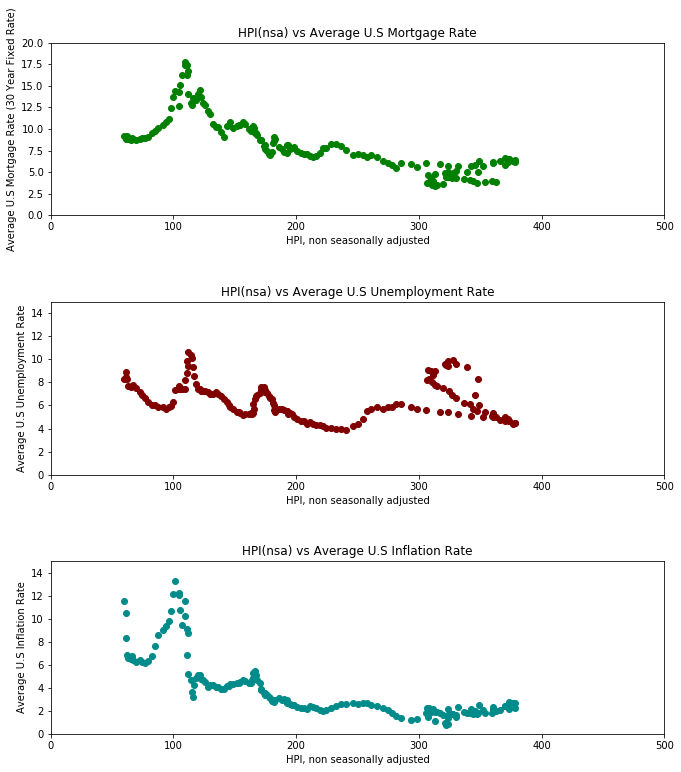

In [102]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(11)
fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9,
                      wspace=1.5, hspace=0.5)
        
axis1 = fig.add_subplot(311)
axis1.set_xlim([0,500])
axis1.set_ylim([0,20])
axis1.set_xlabel('HPI, non seasonally adjusted')
axis1.set_ylabel('Average U.S Mortgage Rate (30 Year Fixed Rate)')
axis1.scatter(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['U.S Interest Rate'], color='g')
plt.title("HPI(nsa) vs Average U.S Mortgage Rate")

axis2 = fig.add_subplot(312)
axis2.set_xlim([0,500])
axis2.set_ylim([0,15])
axis2.set_xlabel('HPI, non seasonally adjusted')
axis2.set_ylabel('Average U.S Unemployment Rate')
axis2.scatter(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['Unemployment Rate'],color= 'maroon')
plt.title("HPI(nsa) vs Average U.S Unemployment Rate")

axis3 = fig.add_subplot(313)
axis3.set_xlim([0,500])
axis3.set_ylim([0,15])
axis3.set_xlabel('HPI, non seasonally adjusted')
axis3.set_ylabel('Average U.S Inflation Rate')
axis3.scatter(hpi_mi_idx_merge['index_nsa'], hpi_mi_idx_merge['Inflation Rate'],color= 'darkcyan')
plt.title("HPI(nsa) vs Average U.S Inflation Rate")

plt.show()

In [103]:
hpi_mi_idx_merge.head()

,place_name,U.S Interest Rate,Unemployment Rate,Inflation Rate,index_nsa
1975-03-31,United States,9.168462,8.266667,11.533333,59.71
1975-06-30,United States,8.875385,8.866667,10.466667,61.12
1975-09-30,United States,8.983846,8.466667,8.333333,61.24
1975-12-31,United States,9.160769,8.300000,6.833333,62.27
1976-03-31,United States,8.873077,7.733333,6.600000,62.82


convert the index to a column

In [104]:
hpi_mi_idx_merge['Quarter_end_date'] = hpi_mi_idx_merge.index
hpi_mi_idx_merge['UNIX_Quarter_end_date'] = hpi_mi_idx_merge['Quarter_end_date'].astype('int64')//10**9
hpi_mi_idx_merge.head()

,place_name,U.S Interest Rate,Unemployment Rate,Inflation Rate,index_nsa,Quarter_end_date,UNIX_Quarter_end_date
1975-03-31,United States,9.168462,8.266667,11.533333,59.71,1975-03-31,165456000
1975-06-30,United States,8.875385,8.866667,10.466667,61.12,1975-06-30,173318400
1975-09-30,United States,8.983846,8.466667,8.333333,61.24,1975-09-30,181267200
1975-12-31,United States,9.160769,8.300000,6.833333,62.27,1975-12-31,189216000
1976-03-31,United States,8.873077,7.733333,6.600000,62.82,1976-03-31,197078400


In [105]:
pd.to_datetime(165456000, unit='s')

Timestamp('1975-03-31 00:00:00')

In [106]:
hpi_mi_idx_merge = hpi_mi_idx_merge.reset_index(drop=True)

In [107]:
hpi_mi_idx_merge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
U.S Interest Rate,164.0,8.378286e+00,3.233671e+00,3.359231e+00,6.084038e+00,7.922308e+00,1.012462e+01,1.773571e+01
Unemployment Rate,164.0,6.495528e+00,1.573323e+00,3.900000e+00,5.333333e+00,6.133333e+00,7.433333e+00,1.066667e+01
Inflation Rate,164.0,3.994106e+00,2.727119e+00,7.333333e-01,2.133333e+00,2.883333e+00,4.708333e+00,1.330000e+01
index_nsa,164.0,2.104241e+02,9.718421e+01,5.971000e+01,1.256175e+02,1.872800e+02,3.107050e+02,3.782100e+02
UNIX_Quarter_end_date,164.0,8.084980e+08,3.746427e+08,1.654560e+08,4.869720e+08,8.084448e+08,1.130026e+09,1.451520e+09


## Model Selection

Input Data for ML

In [108]:
x_cols = ['UNIX_Quarter_end_date', 'U.S Interest Rate','Unemployment Rate', 'Inflation Rate']
y_col = ['index_nsa']
x = hpi_mi_idx_merge[x_cols]
y = hpi_mi_idx_merge[y_col]

Split Train and Test Data

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =324)

### Training Phase

In [110]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Testing Phase

In [111]:
lin_predict = lin_regressor.predict(x_test)

In [112]:
y_test[:5]

,index_nsa
18,96.39
36,118.82
148,307.86
8,69.41
82,188.71


In [113]:
lin_predict[:5]


array([[ 94.47316079],
       [115.33578346],
       [338.46441772],
       [ 58.31043983],
       [207.86984767]])

In [114]:
lin_rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=lin_predict))

### RMSE using Linear Regression Model

In [115]:
lin_rmse

28.897076631036008

In [116]:
dc_regressor = DecisionTreeRegressor(max_depth=20)
dc_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
dc_predict = dc_regressor.predict(x_test)

In [118]:
list(dc_predict[:5])

[94.36, 105.32, 306.59, 65.48, 190.19]

In [119]:
dc_rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=dc_predict))

### RMSE using Decision Tree Regression Model

In [120]:
dc_rmse

6.2014262718247295

In [121]:
a = np.arange(500)

## Data Visualization to show Predicted Vs Actual value

Text(0.5,1,'Predicted vs Expected - Decision Tree Regression Model')

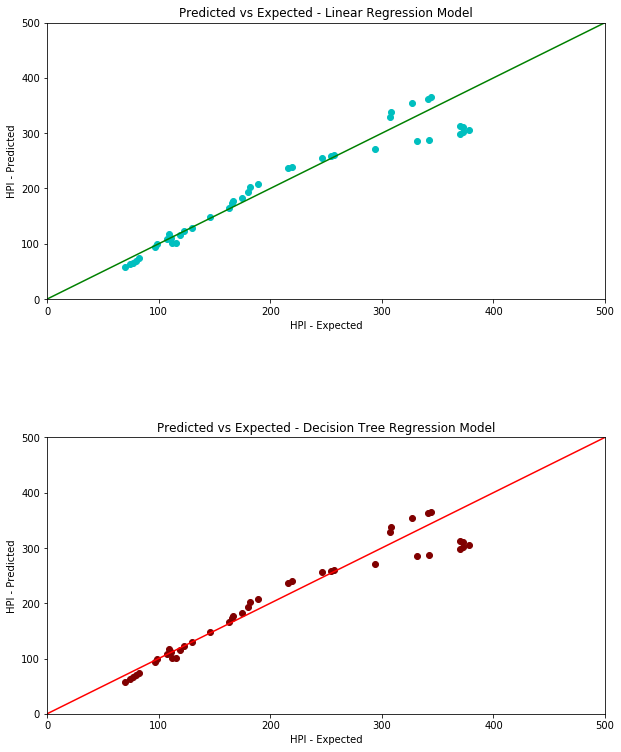

In [122]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(10)
fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9,
                      wspace=1.5, hspace=0.5)

axis1 = fig.add_subplot(211)
axis1.set_xlim([0,500])
axis1.set_ylim([0,500])
axis1.set_xlabel('HPI - Expected')
axis1.set_ylabel('HPI - Predicted')
axis1.plot(a, color = 'g')
axis1.scatter(y_test, lin_predict, color='c')
plt.title("Predicted vs Expected - Linear Regression Model")

axis2 = fig.add_subplot(212)
axis2.set_xlim([0,500])
axis2.set_ylim([0,500])
axis2.set_xlabel('HPI - Expected')
axis2.set_ylabel('HPI - Predicted')
axis2.plot(a, color = 'r')
axis2.scatter(y_test, lin_predict, color='maroon')
plt.title("Predicted vs Expected - Decision Tree Regression Model")

#plt.plot(a)
#plt.scatter(y_test, lin_predict, color='r')
#plt.scatter(y_test, dc_predict, color='g')